In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [309]:
df = pd.read_csv('/home/mohsen/Mohsen/University/Applied_Statistics_and_Data_Mining/Assignment/clustering/Live_20210128.csv'
                 )
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [310]:
le = preprocessing.LabelEncoder()
df[[ 'status_type']] = df[['status_type']].apply(le.fit_transform)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,1,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,1,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,1,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,1,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [311]:
df.drop(columns=df.columns[-10:], axis=1,  inplace=True)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,1,3,4/22/2018 6:00,529,512,262
1,2,1,4/21/2018 22:45,150,0,0
2,3,3,4/21/2018 6:17,227,236,57
3,4,1,4/21/2018 2:29,111,0,0
4,5,1,4/18/2018 3:22,213,0,0
...,...,...,...,...,...,...
7045,7046,1,9/24/2016 2:58,89,0,0
7046,7047,1,9/23/2016 11:19,16,0,0
7047,7048,1,9/21/2016 23:03,2,0,0
7048,7049,1,9/20/2016 0:43,351,12,22


In [312]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [313]:
df

,num_reactions,num_comments,num_shares
0,529,512,262
1,150,0,0
2,227,236,57
3,111,0,0
4,213,0,0
...,...,...,...
7045,89,0,0
7046,16,0,0
7047,2,0,0
7048,351,12,22


In [314]:
df.shape

(7050, 3)

In [315]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
dtypes: int64(3)
memory usage: 165.4 KB


In [316]:
#plt.close()
#sns.set_style("whitegrid")
#sns.pairplot(df, hue="num_angrys", height=3)
#sns.pairplot(df, hue="num_angrys", corner=True)
#plt.show()

#g = sns.pairplot(df, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

In [317]:
sc = StandardScaler().fit(df)
df = sc.transform(df)
df[0:5]

array([[ 0.64610394,  0.32335035,  1.6868788 ],
       [-0.17319166, -0.25220622, -0.3041444 ],
       [-0.00673846,  0.01308938,  0.12901714],
       [-0.25749912, -0.25220622, -0.3041444 ],
       [-0.03700268, -0.25220622, -0.3041444 ]])

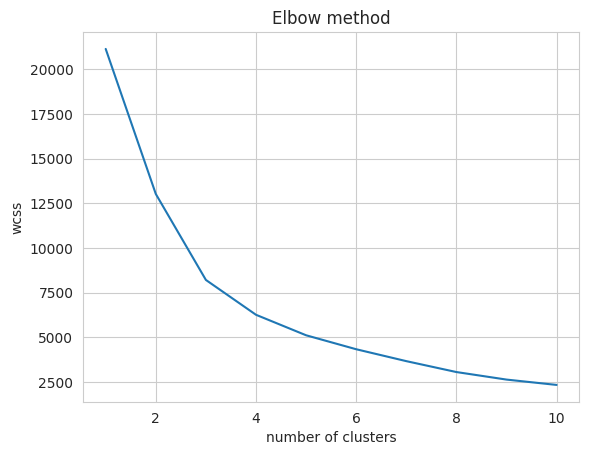

In [318]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(init="k-means++" , n_clusters=i , random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [319]:
kmeans = KMeans(init="k-means++" , n_clusters=3 , random_state=42)
y_kmeans = kmeans.fit_predict(df)

In [320]:
#colours = ["red", "blue", "green"]

#plt.figure(figsize=(8,8))
#for i in range(3):
#    plt.scatter(df[y_kmeans == i, 0], df[y_kmeans == i, 1],
#               s = 100, c = colours[i], label = 'Cluster'+str(i+1))
#plt.title('Cluster of Users')
#plt.xlabel('Dimension1')
#plt.ylabel('Dimension2')
#plt.legend()
#plt.show()

In [321]:
from sklearn.decomposition import PCA

In [322]:
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)
sum(pca.explained_variance_ratio_)

0.8830467309110815

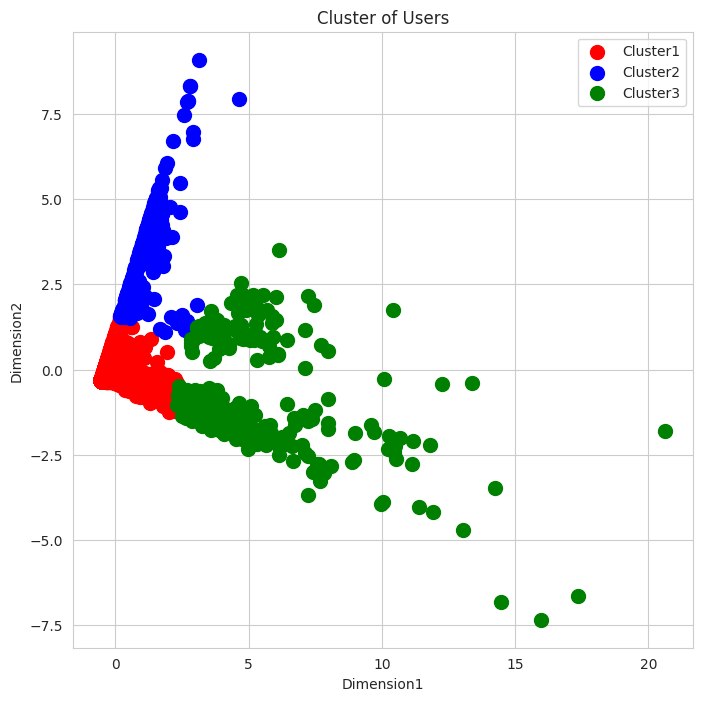

In [323]:
colours = ["red", "blue", "green", "orange"]

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(df_reduced[y_kmeans == i, 0], df_reduced[y_kmeans == i, 1],
               s = 100, c = colours[i], label = 'Cluster'+str(i+1))
plt.title('Cluster of Users')
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.legend()
plt.show()